In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("C:/Users/Luminita/Downloads/archive (2)/fake_job_postings.csv")

In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
df.isnull().values.any()

True

In [6]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [7]:
df.shape

(17880, 18)

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x
df_num=df.apply(Labelencoder_feature)
df_num.head()
#we can use sklearn.preprocessing.LabelEncoder to convert all categorial features to numeric 
#and also consider Nan-Values as a separate category

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,6043,2535,758,874,1526,4506,3827,6204,0,1,0,2,4,13,131,22,0
1,1,2183,1073,1161,874,50,7255,10524,5569,0,1,0,1,6,13,75,7,0
2,2,1763,1867,1337,874,1389,7470,4558,6204,0,1,0,5,7,13,131,37,0
3,3,299,1703,1054,874,975,9590,3164,3333,0,1,0,1,5,1,22,31,0
4,4,975,1741,1337,874,1210,5724,6493,2253,0,1,1,1,5,1,51,16,0


In [9]:
x=df_num.drop(columns=['fraudulent'])
x

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function
0,0,6043,2535,758,874,1526,4506,3827,6204,0,1,0,2,4,13,131,22
1,1,2183,1073,1161,874,50,7255,10524,5569,0,1,0,1,6,13,75,7
2,2,1763,1867,1337,874,1389,7470,4558,6204,0,1,0,5,7,13,131,37
3,3,299,1703,1054,874,975,9590,3164,3333,0,1,0,1,5,1,22,31
4,4,975,1741,1337,874,1210,5724,6493,2253,0,1,1,1,5,1,51,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17875,268,166,1054,874,1391,6152,9677,5456,0,1,1,1,5,13,22,31
17876,17876,7101,2734,62,874,1546,10355,151,2547,0,1,1,1,5,1,61,0
17877,17877,7579,2875,1337,874,1430,4258,1787,6204,0,0,0,1,7,13,131,37
17878,17878,4107,1045,1337,874,1709,7024,441,1706,0,0,1,0,6,6,48,9


In [10]:
y=df_num['fraudulent']
y

0        0
1        0
2        0
3        0
4        0
        ..
17875    0
17876    0
17877    0
17878    0
17879    0
Name: fraudulent, Length: 17880, dtype: int64

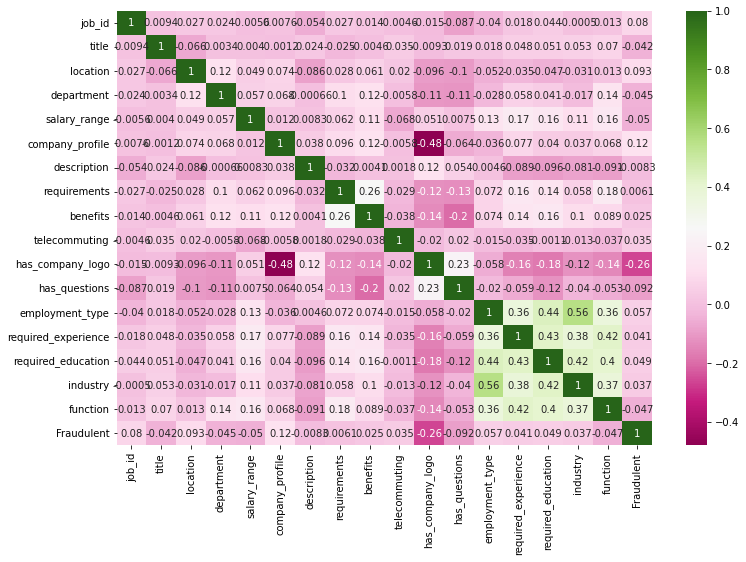

In [11]:
# Analyze the correlation between features and the target
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

full_data = x.copy()

full_data["Fraudulent"] = y.copy()

corr = full_data.corr()

sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,
            cmap="PiYG");

In [12]:
feature=df_num.drop(columns=['fraudulent'])
label=df_num['fraudulent']

In [13]:
from scipy.stats import pearsonr

corre=pd.DataFrame()

for i in feature.columns:
    corre[i]= pearsonr(label, feature[i])
    
    
corre

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function
0,7.987229e-02,-4.161851e-02,9.280270e-02,-4.488718e-02,-5.020108e-02,1.232925e-01,-0.008302,0.006080,0.024891,0.034523,-2.619713e-01,-9.162726e-02,5.707049e-02,4.132760e-02,4.895513e-02,3.729680e-02,-4.746056e-02
1,1.056291e-26,2.590304e-08,1.683387e-35,1.916313e-09,1.861931e-11,1.649209e-61,0.266991,0.416212,0.000873,0.000004,2.213970e-278,1.203555e-34,2.224537e-14,3.236404e-08,5.770715e-11,6.082787e-07,2.161910e-10


In [14]:
corre1=corre.T
corre1
corre1

,0,1
job_id,0.079872,1.056291e-26
title,-0.041619,2.590304e-08
location,0.092803,1.683387e-35
department,-0.044887,1.916313e-09
salary_range,-0.050201,1.861931e-11
company_profile,0.123293,1.649209e-61
description,-0.008302,2.669915e-01
requirements,0.006080,4.162123e-01
benefits,0.024891,8.726139e-04
telecommuting,0.034523,3.887303e-06


In [15]:
corre1=corre.T
corre1
coore2= corre1.iloc[:,0].sort_values(ascending=False)
coore2
coore2= corre1.iloc[:,0].sort_values(ascending=False)
coore2

company_profile        0.123293
location               0.092803
job_id                 0.079872
employment_type        0.057070
required_education     0.048955
required_experience    0.041328
industry               0.037297
telecommuting          0.034523
benefits               0.024891
requirements           0.006080
description           -0.008302
title                 -0.041619
department            -0.044887
function              -0.047461
salary_range          -0.050201
has_questions         -0.091627
has_company_logo      -0.261971
Name: 0, dtype: float64

In [16]:
reduced_df= df[["company_profile" ,"location", "employment_type", "required_education", "required_experience", "industry",
              "telecommuting", "benefits", "requirements", "description", "fraudulent"]]
reduced_df

,company_profile,location,employment_type,required_education,required_experience,industry,telecommuting,benefits,requirements,description,fraudulent
0,"We're Food52, and we've created a groundbreaki...","US, NY, New York",Other,NaN,Internship,NaN,0,NaN,Experience with content management systems a m...,"Food52, a fast-growing, James Beard Award-winn...",0
1,"90 Seconds, the worlds Cloud Video Production ...","NZ, , Auckland",Full-time,NaN,Not Applicable,Marketing and Advertising,0,What you will get from usThrough being part of...,What we expect from you:Your key responsibilit...,Organised - Focused - Vibrant - Awesome!Do you...,0
2,Valor Services provides Workforce Solutions th...,"US, IA, Wever",NaN,NaN,NaN,NaN,0,NaN,Implement pre-commissioning and commissioning ...,"Our client, located in Houston, is actively se...",0
3,Our passion for improving quality of life thro...,"US, DC, Washington",Full-time,Bachelor's Degree,Mid-Senior level,Computer Software,0,Our culture is anything but corporate—we have ...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",THE COMPANY: ESRI – Environmental Systems Rese...,0
4,SpotSource Solutions LLC is a Global Human Cap...,"US, FL, Fort Worth",Full-time,Bachelor's Degree,Mid-Senior level,Hospital & Health Care,0,Full Benefits Offered,QUALIFICATIONS:RN license in the State of Texa...,JOB TITLE: Itemization Review ManagerLOCATION:...,0
...,...,...,...,...,...,...,...,...,...,...,...
17875,Vend is looking for some awesome new talent to...,"CA, ON, Toronto",Full-time,NaN,Mid-Senior level,Computer Software,0,What can you expect from us?We have an open cu...,To ace this role you:Will eat comprehensive St...,Just in case this is the first time you’ve vis...,0
17876,WebLinc is the e-commerce platform and service...,"US, PA, Philadelphia",Full-time,Bachelor's Degree,Mid-Senior level,Internet,0,Health &amp; WellnessMedical planPrescription ...,- B.A. or B.S. in Accounting- Desire to have f...,The Payroll Accountant will focus primarily on...,0
17877,We Provide Full Time Permanent Positions for m...,"US, TX, Houston",Full-time,NaN,NaN,NaN,0,NaN,At least 12 years professional experience.Abil...,Experienced Project Cost Control Staff Enginee...,0
17878,NaN,"NG, LA, Lagos",Contract,Professional,Not Applicable,Graphic Design,0,Competitive salary (compensation will be based...,1. Must be fluent in the latest versions of Co...,Nemsia Studios is looking for an experienced v...,0


In [17]:
#Question 1: In which industry can we find the most fake job ads?
df_industry = df[df['fraudulent']== 1]

In [18]:
df_industry.shape


(866, 18)

In [19]:
df_industry['industry'].value_counts()


Oil & Energy                   109
Accounting                      57
Hospital & Health Care          51
Marketing and Advertising       45
Financial Services              35
                              ... 
Civic & Social Organization      1
Public Safety                    1
Wholesale                        1
Consumer Goods                   1
Online Media                     1
Name: industry, Length: 62, dtype: int64

In [20]:
df_industry['industry'].value_counts()[:15]

Oil & Energy                           109
Accounting                              57
Hospital & Health Care                  51
Marketing and Advertising               45
Financial Services                      35
Information Technology and Services     32
Telecommunications                      26
Real Estate                             24
Consumer Services                       24
Leisure, Travel & Tourism               21
Health, Wellness and Fitness            15
Hospitality                             14
Computer Networking                     12
Staffing and Recruiting                  8
Insurance                                6
Name: industry, dtype: int64

<AxesSubplot:>

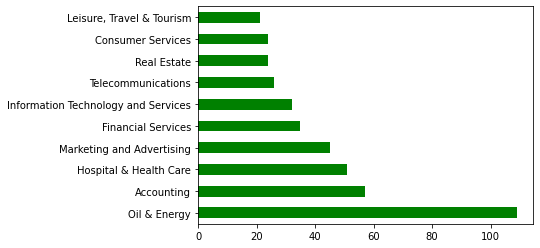

In [21]:
df_industry['industry'].value_counts()[:10].plot(kind='barh', color="green")

In [22]:
#What are the most frequent fake job titles?
print(df[df.fraudulent==1].title.value_counts()[:10])

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: title, dtype: int64


<AxesSubplot:>

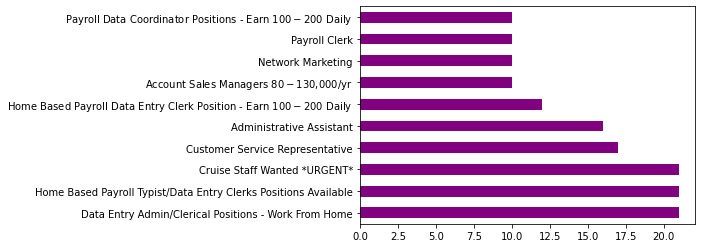

In [23]:
df[df.fraudulent==1].title.value_counts()[:10].plot(kind='barh', color="purple")

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X1 = df_num[["company_profile" ,"location", "employment_type", "required_education", "required_experience", "industry",
              "telecommuting", "benefits", "requirements", "description"]].values
Y1 = df_num[['fraudulent']].values

In [26]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1)

In [27]:
X1_train.shape, X1_test.shape, Y1_train.shape, Y1_test.shape


((13410, 10), (4470, 10), (13410, 1), (4470, 1))

In [28]:
#Logistic Regression
#Independent variable: X1
#Dependent variable: Y1 (Checks if the posted job is fake)
#Train the model:
from sklearn.linear_model import LogisticRegression


In [29]:
LgR = LogisticRegression()


In [30]:
LgR.fit(X1_train, Y1_train)


C:\Users\Luminita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Luminita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
Y1_pred = LgR.predict(X1_test)


In [32]:
Y1_test = Y1_test.flatten()
Y1_pred = Y1_pred.flatten()

In [33]:
Y1_test.shape, Y1_pred.shape


((4470,), (4470,))

In [34]:
df_lgr = pd.DataFrame({'Y1_test': Y1_test , 'Y1_pred': Y1_pred}) 
df_lgr


,Y1_test,Y1_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
4465,0,0
4466,0,0
4467,0,0
4468,1,0


In [35]:
len(Y1_test[Y1_test == 0]), len(Y1_test[Y1_test== 1]) 
# Shows us how many real and fake jobs are within our test dataset

(4253, 217)

In [36]:
#Check accuracy:
from sklearn.metrics import accuracy_score


In [37]:
accuracy_score(Y1_pred, Y1_test)


0.9514541387024609

In [38]:
#Accuracy using Logistic Regression is 95%

In [39]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=50)
model=clf.fit(X1_train,Y1_train)

C:\Users\Luminita\AppData\Local\Temp/ipykernel_18488/351578278.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=clf.fit(X1_train,Y1_train)


In [40]:
Y1_pred=clf.predict(X1_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cnf=confusion_matrix(Y1_pred,Y1_test)

In [41]:
cnf

array([[4245,   84],
       [   8,  133]], dtype=int64)

<AxesSubplot:>

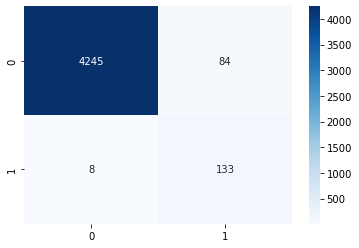

In [42]:
sns.heatmap(cnf,annot=True, cmap='Blues', fmt='g')

In [43]:
classificationreport=classification_report(Y1_pred,Y1_test)
print(classificationreport)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4329
           1       0.61      0.94      0.74       141

    accuracy                           0.98      4470
   macro avg       0.81      0.96      0.87      4470
weighted avg       0.99      0.98      0.98      4470



In [44]:
acc=accuracy_score(Y1_pred,Y1_test)
acc

0.9794183445190157

In [45]:
acc=accuracy_score(Y1_pred,Y1_test)

In [46]:
#Separate Fake and Real jobs
df_description_fraud=df[['description', 'fraudulent']]

df_real=df_description_fraud.loc[df['fraudulent']==0]
df_fake=df_description_fraud.loc[df['fraudulent']==1]

In [47]:
df_fake.shape

(866, 2)

In [48]:
df_real.shape

(17014, 2)

In [49]:
df['description'] = df['description'].astype('str')
df_fake['description'] = df_fake['description'].astype('str')

C:\Users\Luminita\AppData\Local\Temp/ipykernel_18488/1412163468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake['description'] = df_fake['description'].astype('str')


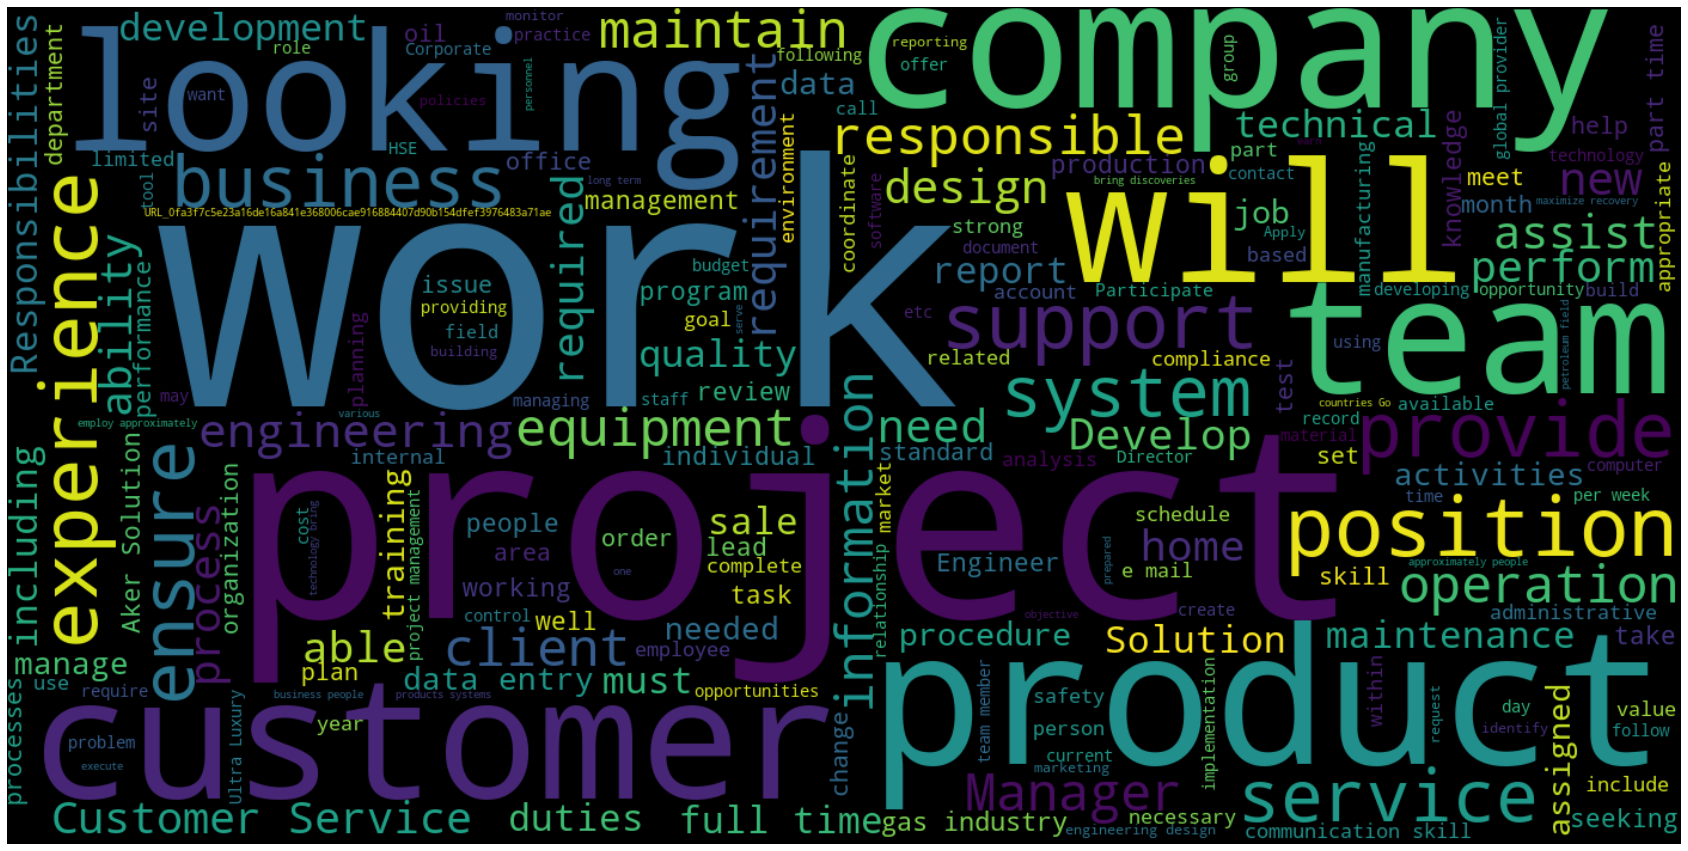

In [50]:
#Fake jobs wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

target_text = " ".join(df_fake['description'])
wordcloud = WordCloud(width=1400, height=700).generate(text=target_text)
plt.figure(figsize=(30,18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

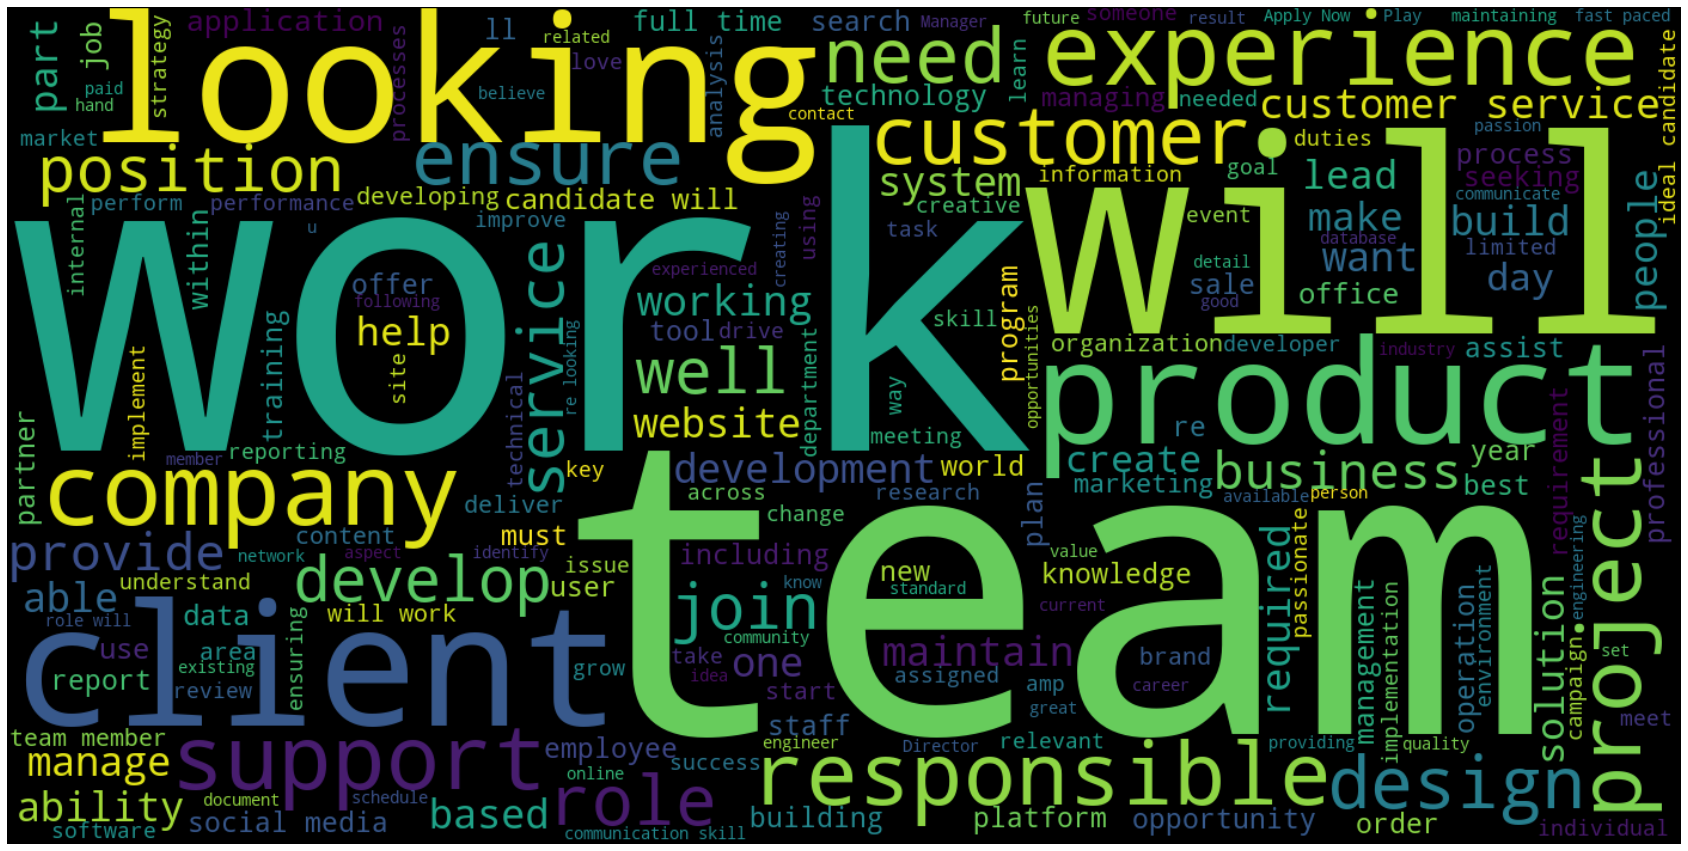

In [51]:
#Real job wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

target_text = " ".join(df_real['description'])
wordcloud = WordCloud(width=1400, height=700).generate(text=target_text)
plt.figure(figsize=(30,18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [52]:
!pip3 install spacy
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz
!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_sm
!python -m spacy download en
import nltk
nltk.download('stopwords')
import spacy
nlp = spacy.load('en_core_web_lg')
import base64
import string
import re
from collections import Counter
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
punctuations = string.punctuation
def cleanup_text(docs, logging = False):
    texts = []
    for doc in docs:
        doc = nlp(doc, disable = ['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-py3-none-any.whl size=12019124 sha256=36bbbeccb7a9f0c9b588dc6050bc58e2398e67580b25149eb2cfdc83a1fda823
  Stored in directory: c:\users\luminita\appdata\local\pip\cache\wheels\02\87\47\4d729a97cc46afa46135595b4de32d01461f05947df39166d7
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.2.0
    Uninstalling en-core-web-sm-3.2.0:
      Successfully uninstalled en-core-web-sm-3.2.0


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.0
    Uninstalling en-core-web-sm-2.2.0:
      Successfully uninstalled en-core-web-sm-2.2.0
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.2.0/en_core_web_sm-3.2.0-py3-none-any.whl (13.9 MB)
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Luminita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


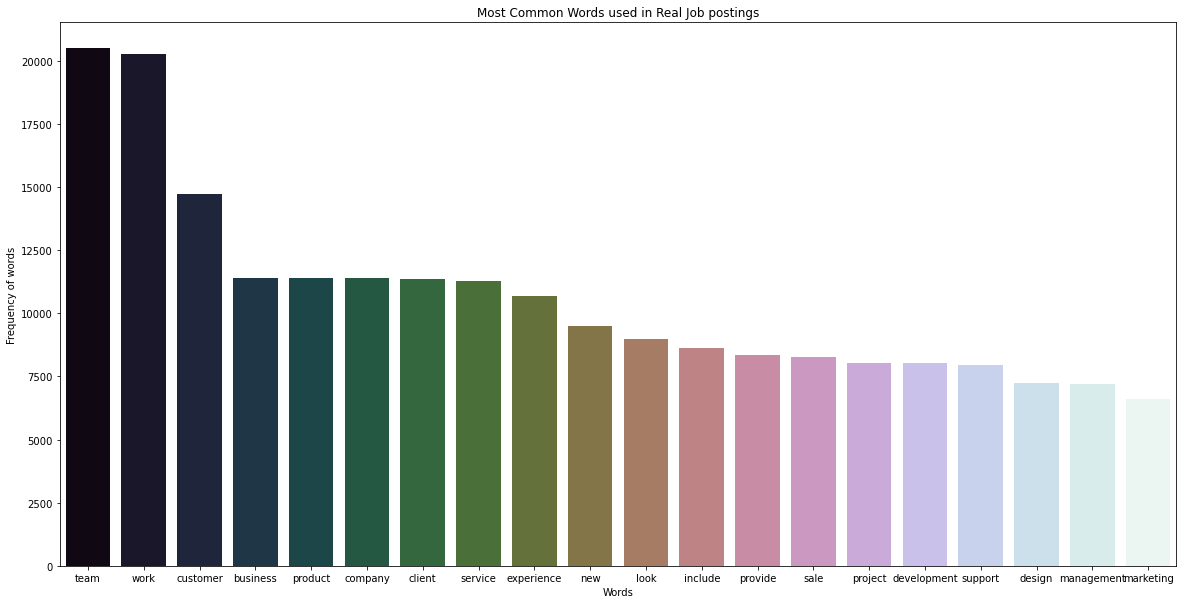

In [53]:
#Most Common words used in Real Jobs
Fraud_0 = [text for text in df_real[df_real['fraudulent'] == 0]['description']]
Fraud_0_clean = cleanup_text(Fraud_0)
Fraud_0_clean = ' '.join(Fraud_0_clean).split()
Fraud_0_counts = Counter(Fraud_0_clean)
Fraud_0_common_words = [word[0] for word in Fraud_0_counts.most_common(20)]
Fraud_0_common_counts = [word[1] for word in Fraud_0_counts.most_common(20)]
fig = plt.figure(figsize = (20, 10))
pal = sns.color_palette("cubehelix", 20)
sns.barplot(x = Fraud_0_common_words, y = Fraud_0_common_counts, palette=pal)
plt.title('Most Common Words used in Real Job postings')
plt.ylabel("Frequency of words")
plt.xlabel("Words")
plt.show()

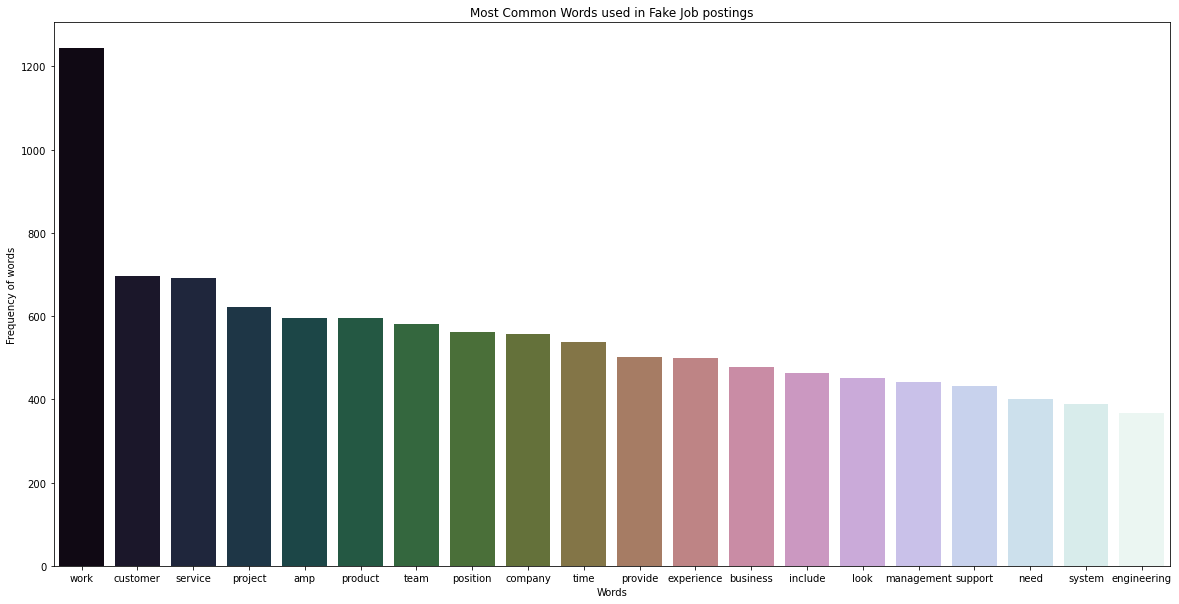

In [54]:
#Most Common words used in Fake Jobs
Fraud_1 = [text for text in df_fake[df_fake['fraudulent'] == 1]['description']]
Fraud_1_clean = cleanup_text(Fraud_1)
Fraud_1_clean = ' '.join(Fraud_1_clean).split()
Fraud_1_counts = Counter(Fraud_1_clean)
Fraud_1_common_words = [word[0] for word in Fraud_1_counts.most_common(20)]
Fraud_1_common_counts = [word[1] for word in Fraud_1_counts.most_common(20)]
fig = plt.figure(figsize = (20, 10))
pal = sns.color_palette("cubehelix", 20)
sns.barplot(x = Fraud_1_common_words, y = Fraud_1_common_counts, palette=pal)
plt.title('Most Common Words used in Fake Job postings')
plt.ylabel("Frequency of words")
plt.xlabel("Words")
plt.show()